# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score  # Or other metrics depending on your task
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Loading datafile

In [3]:
file_path_1 =  r"..\Extracted_files\HHV1_PERV1_merged.dta"

In [4]:
df = pd.read_stata(file_path_1)

In [6]:
df.head()

,hhvar1,hhvar2,hhvar3,hhvar4,hhvar5,hhvar6,hhvar7,hhvar8,hhvar9,hhvar10,...,pvar134,pvar135,pvar136,pvar137,pvar138,pvar139,perid,_merge,weights,usual_status_code
0,FVH7,104,Q1,V1,1,02,04,021,01,14,...,0,0,2,4,246798,4,Q1V1110002110101,both,308,94.0
1,FVH7,104,Q1,V1,1,02,04,021,01,14,...,0,0,2,4,246798,4,Q1V1110002110102,both,308,93.0
2,FVH7,104,Q1,V1,1,02,04,021,01,14,...,0,6500,2,4,246798,4,Q1V1110002110103,both,308,11.0
3,FVH7,104,Q1,V1,1,02,04,021,01,14,...,0,0,2,4,246798,4,Q1V1110002110104,both,308,21.0
4,FVH7,104,Q1,V1,1,02,04,021,01,14,...,0,0,2,4,246798,4,Q1V1110002110105,both,308,91.0


## Documentation
RQ: What determines status of employment?

# Preprocessing

## Changing formats

In [7]:
#To numeric
numeric_columns = ['hhvar21', 'hhvar30', 'pvar20', 'pvar24', 'pvar29']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

#To categorical
categorical_columns = ['hhvar5', 'hhvar6', 'hhvar7', 'hhvar23', 'hhvar24', 'pvar18', 'pvar19',  'pvar21', 'pvar22', 'pvar23', 'pvar26', 'pvar28', 'pvar30']
df[categorical_columns] = df[categorical_columns].astype('category')

## Adding columns

In [8]:
#Creating dummy for employment
df["dummy_employed"] = np.where(df['usual_status_code']<=51,1,0)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_26872\3294462305.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dummy_employed"] = np.where(df['usual_status_code']<=51,1,0)


## Filtering

In [9]:
#Filtering for columns
filtered_columns = ['hhvar5', 'hhvar6', 'hhvar7', 'hhvar21', 'hhvar23', 'hhvar24', 'hhvar30', 'pvar18', 'pvar19', 'pvar20', 'pvar21', 'pvar22', 'pvar23', 'pvar24', 'pvar26', 'pvar28', 'pvar29', 'pvar30', 'pvar32', 'pvar43', 'usual_status_code', 'dummy_employed']
df_filtered = df.loc[:,filtered_columns]

#Filtering for age
df_filtered = df_filtered.loc[(df_filtered["pvar20"]>=12) & (df_filtered["pvar20"]<=59)]

In [10]:
df_filtered.head()

,hhvar5,hhvar6,hhvar7,hhvar21,hhvar23,hhvar24,hhvar30,pvar18,pvar19,pvar20,...,pvar23,pvar24,pvar26,pvar28,pvar29,pvar30,pvar32,pvar43,usual_status_code,dummy_employed
2,1,02,04,7,1,2,8733,3,male,40,...,01,10,2,,NaN,,11,NaN,11.0,1
3,1,02,04,7,1,2,8733,4,female,35,...,01,10,2,,NaN,,21,NaN,21.0,1
4,1,02,04,7,1,2,8733,6,male,15,...,01,9,6,,NaN,,91,NaN,91.0,0
5,1,02,04,7,1,2,8733,6,male,12,...,01,6,6,,NaN,,91,NaN,91.0,0
6,1,02,04,7,1,2,8733,6,female,16,...,01,12,2,,NaN,,91,21.0,21.0,1


In [11]:
df_filtered.describe(include = "all")

,hhvar5,hhvar6,hhvar7,hhvar21,hhvar23,hhvar24,hhvar30,pvar18,pvar19,pvar20,...,pvar23,pvar24,pvar26,pvar28,pvar29,pvar30,pvar32,pvar43,usual_status_code,dummy_employed
count,296501,296501,296501,296501.000000,296501,296501,296501.000000,296501,296501,296501.000000,...,296501,296501.000000,296501,296501,13031.000000,296501,296501.000000,47716.000000,296501.000000,296501.000000
unique,2,36,75,NaN,8,4,NaN,9,3,NaN,...,16,NaN,6,23,NaN,4,NaN,NaN,NaN,NaN
top,1,09,01,NaN,1,3,NaN,5,male,NaN,...,01,NaN,6,,NaN,,NaN,NaN,NaN,NaN
freq,169234,29828,15542,NaN,218217,122565,NaN,87907,149253,NaN,...,284662,NaN,199525,283470,NaN,283470,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.935407,NaN,NaN,14467.296596,NaN,NaN,32.482494,...,NaN,8.756287,NaN,NaN,3.185711,NaN,57.926402,24.645109,53.958914,0.562642
std,NaN,NaN,NaN,2.116243,NaN,NaN,8078.047291,NaN,NaN,13.234348,...,NaN,4.651696,NaN,NaN,1.495262,NaN,34.397365,14.391093,34.453308,0.496061
min,NaN,NaN,NaN,1.000000,NaN,NaN,500.000000,NaN,NaN,12.000000,...,NaN,0.000000,NaN,NaN,1.000000,NaN,11.000000,11.000000,11.000000,0.000000
25%,NaN,NaN,NaN,4.000000,NaN,NaN,9200.000000,NaN,NaN,21.000000,...,NaN,6.000000,NaN,NaN,2.000000,NaN,21.000000,11.000000,21.000000,0.000000
50%,NaN,NaN,NaN,5.000000,NaN,NaN,12483.000000,NaN,NaN,32.000000,...,NaN,9.000000,NaN,NaN,3.000000,NaN,51.000000,21.000000,51.000000,1.000000
75%,NaN,NaN,NaN,6.000000,NaN,NaN,17467.000000,NaN,NaN,43.000000,...,NaN,12.000000,NaN,NaN,4.000000,NaN,91.000000,41.000000,91.000000,1.000000


## Treating Missing values

Three columns had missing values:
1. pvar28: Field of training
2. pvar29: Duration of training
3. pvar30 Type of training

In [12]:
#Treating missing values
df_filtered[['pvar28', 'pvar30']] = df_filtered[['pvar28', 'pvar30']].replace('', 'no training')
df_filtered['pvar29'] = df_filtered['pvar29'].fillna(0)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_26872\899073683.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered[['pvar28', 'pvar30']] = df_filtered[['pvar28', 'pvar30']].replace('', 'no training')


# Random forests

## Encoding

In [13]:
label_encoder = LabelEncoder()

In [14]:
for col in df_filtered[categorical_columns]:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

## Splitting data

In [15]:
X = df_filtered[numeric_columns + categorical_columns]
y = df_filtered['dummy_employed']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(
                                                 X,y,test_size=0.2, 
                                                 random_state=42
                                                 ) 

## Model fitting (1/n)

In [66]:
model = RandomForestClassifier(n_estimators= 100,
                               n_jobs=-1, 
                               #max_features = 10,
                               oob_score = True,
                               #verbose = True,
                               #min_samples_split=10,
                               random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [67]:
model.oob_score_

0.8679637436762226

In [68]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {f1_score(y_test, y_pred)}")

Accuracy: 0.881839523264913


In [69]:
column_names = ["hhvar5", "hhvar6", "hhvar7", "hhvar21", "hhvar23", "hhvar24", "hhvar30", "pvar18", "pvar19", "pvar20", "pvar21", "pvar22", "pvar23", "pvar24", "pvar26", "pvar28", "pvar29", "pvar30", "pvar32", "pvar43"]
column_labels = [
    "Sector", "State/UT Code", "District Code", "Household Size", "Religion", "Social Group", "HH Monthly Expenditure (Rs.)", "Relationship to Head", "Gender", 
    "Age", "Marital Status", "Education Level", "Technical Education Level", "Years of Formal Education", 
    "Vocational/Technical Training", "Field of Training", "Training Duration", "Type of Training", 
    "Status Code (Principle)", "Status Code (Subsidiary)"
]
column_mapping = dict(zip(column_names,column_labels))

In [70]:
importance_df = pd.DataFrame({'Column': X_train.columns, 'Importance': model.feature_importances_})
importance_df['Column'] = importance_df['Column'].replace(column_mapping)
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

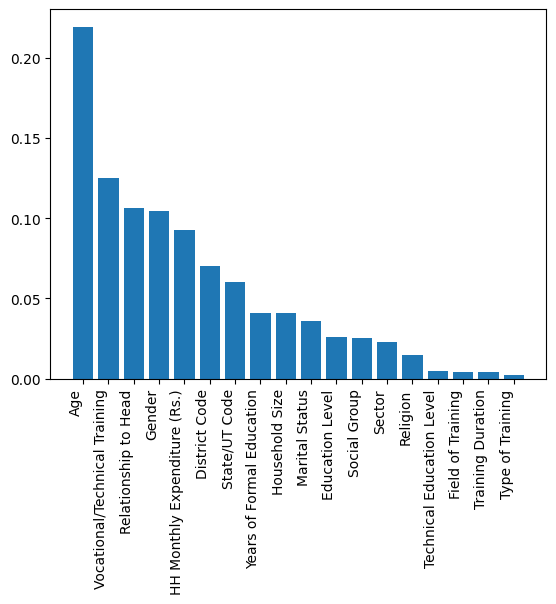

In [71]:
plt.bar(importance_df['Column'], importance_df['Importance'])
plt.xticks(rotation=90, ha='right')
plt.show()

# Evaluation metrics

### Model accuracy

In [215]:
model.oob_score_

0.8691231028667791

In [199]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {f1_score(y_test, y_pred)}")

### Confusion matrix

In [230]:
cm = confusion_matrix(y_test,y_pred)

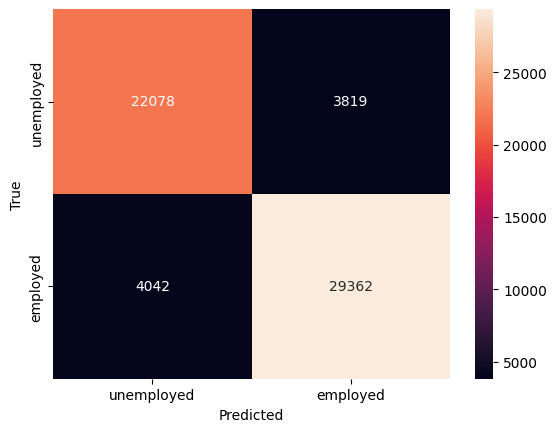

In [241]:
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels=['unemployed', 'employed'], yticklabels= ['unemployed', 'employed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Trial

In [ ]:
n_trees = list(range(2,101,2)) + [150,200]
#oob_score = []
test_accuracy = []
for i,number in enumerate(n_trees):
    model = RandomForestClassifier(n_estimators= number,n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    #oob_score.append(model.oob_score_)
    y_pred = model.predict (X_test)
    test_score = f1_score (y_test, y_pred)
    test_accuracy.append(test_score)
    print(f"Completed with iteration {i+1}")

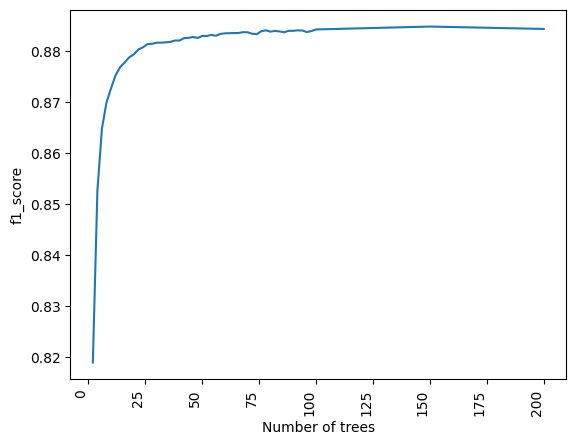

In [29]:
plt.plot(n_trees, test_accuracy)
plt.xticks(rotation=90, ha='right')
plt.ylabel('f1_score')
plt.xlabel('Number of trees')
plt.show()

# Model fitting 2/n

In [223]:
model = RandomForestClassifier(n_estimators=200,
                               min_samples_split=100,
                               n_jobs=-1, 
                               oob_score = True, 
                               random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=42)

In [226]:
model.oob_score_

0.8666736930860034

In [227]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {f1_score(y_test, y_pred)}")

Accuracy: 0.8819403769617782
